### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [62]:
data = pd.read_csv('data/coupons.csv')

In [63]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
weather                     0
temperature                 0
destination                 0
passanger                   0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
income                      0
occupation                  0
has_children                0
education                   0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
12684


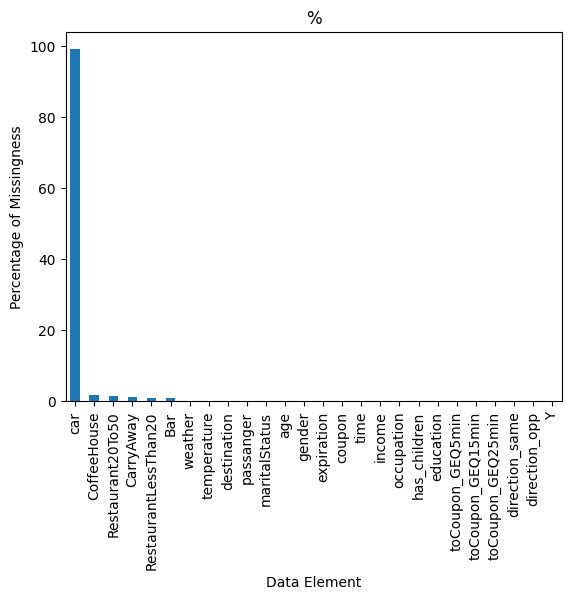

In [64]:
#check for missingness counts
missing_counts = data.isnull().sum().sort_values(ascending = False)
print(missing_counts)
row_count = len(data)
print(row_count)
percent_missing = missing_counts/row_count*100

percent_missing.plot(kind = 'bar')
plt.xlabel("Data Element")
plt.ylabel("Percentage of Missingness")
plt.title("%")
plt.show()



3. Decide what to do about your missing data -- drop, replace, other...

In [65]:
#drop the column car because it has nearly all nulls, drop the rows of the other data columns with nulls since they are minimal

data = data.dropna(subset = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'])

data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [66]:
data = data.dropna(axis= 'columns')

data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



proportion of those that chose to accept the coupon:
0.5421791233049511


<Axes: xlabel='Y', ylabel='count'>

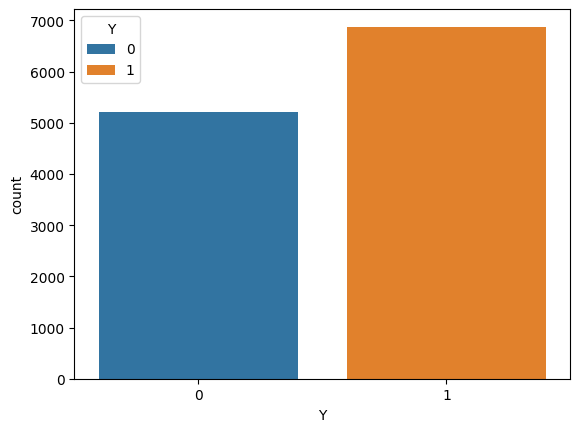

In [203]:
#y/n column
data
ans_y = data['Y'].sum()
print("proportion of those that chose to accept the coupon:")
print(ans_y/row_count)

sns.countplot(data = data, x = 'Y', hue = 'Y')

5. Use a bar plot to visualize the `coupon` column.

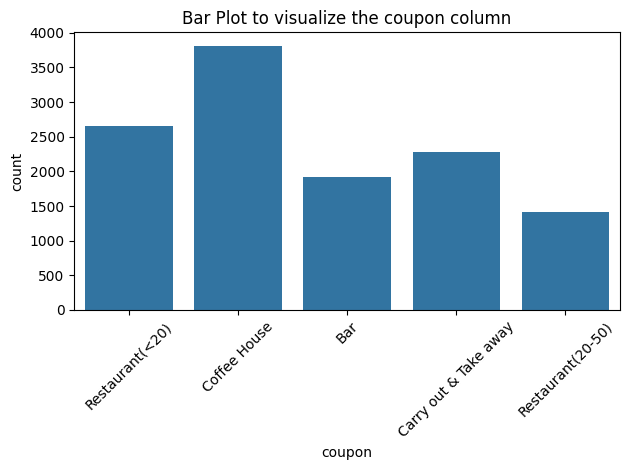

In [204]:
sns.countplot(data, x = 'coupon')
plt.xticks(rotation=45)
plt.title('Bar Plot to visualize the coupon column')
plt.tight_layout()                                      

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

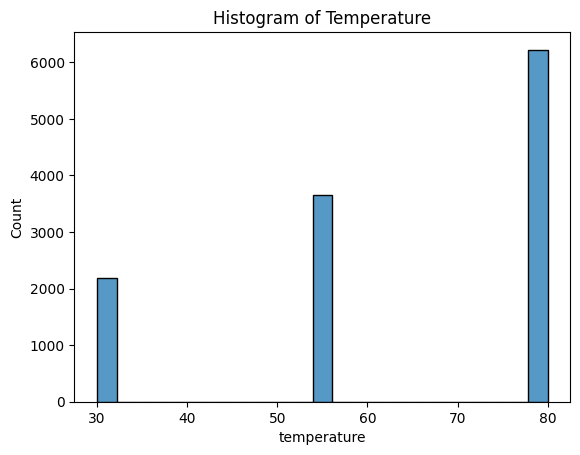

In [88]:
sns.histplot(data = data, x = 'temperature')
plt.title("Histogram of Temperature")

,Y
temperature,
30,0.537130
55,0.537138
80,0.599646


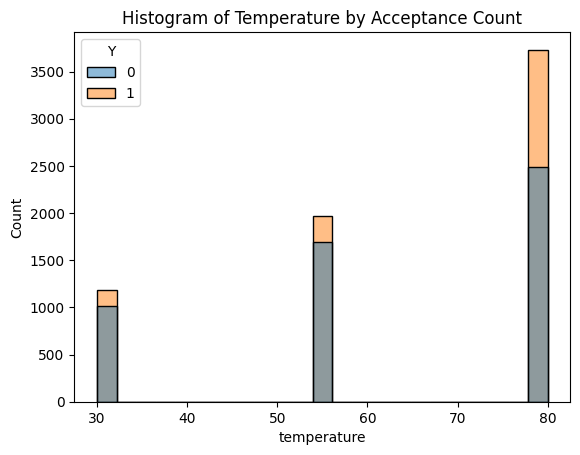

In [205]:
#one more Temperature Histogram
sns.histplot(data = data, x = 'temperature', hue = 'Y')
plt.title("Histogram of Temperature by Acceptance Count")
#it would be interesting to see the average acceptance rate by temperature
data.groupby(['temperature'])[['Y']].mean()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [104]:
DataFrame = data[data['coupon'] == "Bar"]

2. What proportion of bar coupons were accepted?


In [206]:
bar_row_count = len(DataFrame)
acceptance_rate = DataFrame['Y'].mean()
print("The proportion of coupons accepted is")
print(acceptance_rate)

The proportion of coupons accepted is
0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


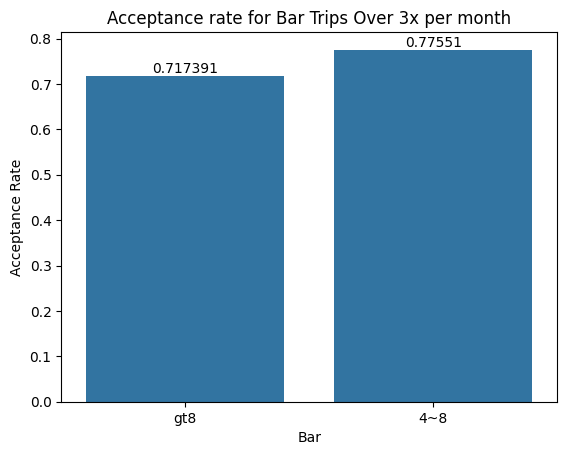

0.7616580310880829


In [231]:
Over3 = DataFrame[(DataFrame['Bar'] == "4~8") | (DataFrame['Bar'] == "gt8")]
over3bar = sns.barplot(Over3, x = 'Bar', y = 'Y', errorbar = None)
over3bar.bar_label(over3bar.containers[0], fontsize = 10)
over3bar.set_title("Acceptance rate for Bar Trips Over 3x per month")
over3bar.set(ylabel='Acceptance Rate')
plt.show()

Over3_acceptance_rate = Over3['Y'].mean()
print(Over3_acceptance_rate)


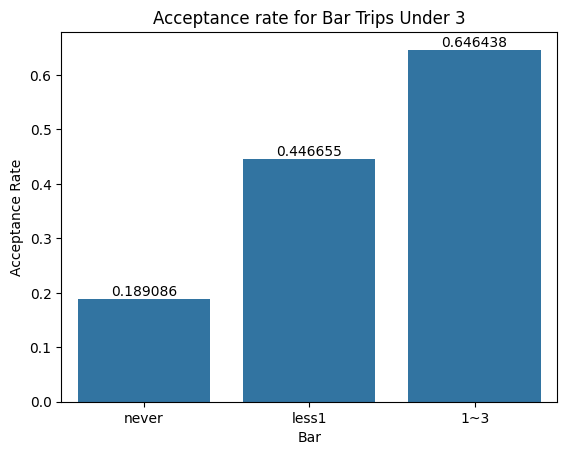

0.37267441860465117


In [230]:
Under3 = DataFrame[(DataFrame['Bar'] != "4~8") & (DataFrame['Bar'] != "gt8")]

under3bar = sns.barplot(Under3, x = 'Bar', y = 'Y', errorbar = None)
under3bar.bar_label(under3bar.containers[0], fontsize = 10)
under3bar.set_title("Acceptance rate for Bar Trips Under 3")
under3bar.set(ylabel='Acceptance Rate')
plt.show()


Under3_Acceptancerate = Under3['Y'].mean()
print(Under3_Acceptancerate)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [157]:

Over1_Over25 = DataFrame.Bar.isin(["4~8", "gt8", "1~3"]) & ~DataFrame.age.isin(["21", "below21"])
Over1_Over25_mean = DataFrame[Over1_Over25].Y.mean()
All_others_mean = DataFrame[~Over1_Over25].Y.mean()
print("The mean for those Over 1 Visit, Over Age of 25 is")
print(Over1_Over25_mean)
print("The mean for all Others is")
print(All_others_mean)


The mean for those Over 1 Visit, Over Age of 25 is
0.6898263027295285
The mean for all Others is
0.33774834437086093


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [186]:
#DataFrame.head()
Bar1_nokids = (DataFrame.Bar.isin(["4~8", "gt8", "1~3"])) & (DataFrame.passanger != 'Kid(s)') & (DataFrame.occupation != 'Farming Fishing & Forestry')
Bar1_nokids_mean = DataFrame[Bar1_nokids].Y.mean()
others_mean = DataFrame[~Bar1_nokids].Y.mean()
print("The Acceptance rate for those hwo visit the bar more than once, with kid passengers and were non-Ag workers is")
print(Bar1_nokids_mean)
print("the Acceptance rate for all others is")
print(others_mean)


The Acceptance rate for those hwo visit the bar more than once, with kid passengers and were non-Ag workers is
0.7094339622641509
the Acceptance rate for all others is
0.29790310918293567


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [202]:
sub_a = (DataFrame.Bar.isin(["4~8", "gt8", "1~3"])) & (DataFrame.passanger != 'Kid(s)') & (DataFrame.maritalStatus != 'Widowed')
sub_b = (DataFrame.Bar.isin(["4~8", "gt8", "1~3"])) & (DataFrame.age.isin(["21", "below21", "25"]))
sub_c = (DataFrame.RestaurantLessThan20.isin(["4~8", "gt8"])) & (DataFrame.income.isin(["$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]))

sub_a_mean = DataFrame[sub_a].Y.mean()
sub_b_mean = DataFrame[sub_b].Y.mean()
sub_c_mean = DataFrame[sub_c].Y.mean()

print("The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is ")
print(sub_a_mean)
print("The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is ")
print(sub_b_mean)
print("The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is ")
print(sub_c_mean)        

The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 
0.7094339622641509
The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 
0.6745562130177515
The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 
0.46153846153846156


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Based on the observations it looks like drivers who have a higher income, or frequent bars more often are likelier to accept the coupon.  I'd want to explore the relationship of this to other factors such as weather though, too.  As it appears there may be an inverse relationship to acceptance and weather.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [217]:
#Let's explore the carry away coupon group to determine the characteristics likely to accept those...

#start by ingesting the data:
NewData = data[data['coupon'] == "Carry out & Take away"]
NewData.head()



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1


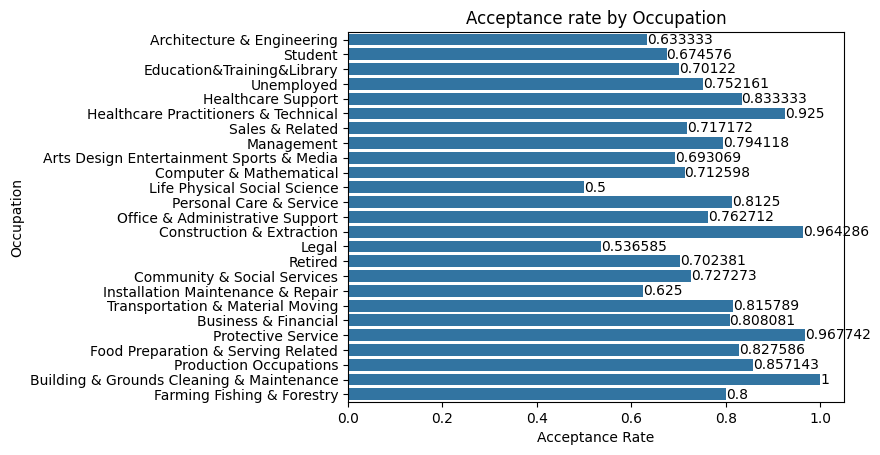

In [249]:
#There are some interesting differences in accpetance rate by occupation as shown below...

OccChart = sns.barplot(NewData, y = 'occupation', x = 'Y', errorbar = None)
OccChart.bar_label(OccChart.containers[0], fontsize = 10)
OccChart.set_title("Acceptance rate by Occupation")
OccChart.set(ylabel="Occupation", xlabel='Acceptance Rate')
plt.show()

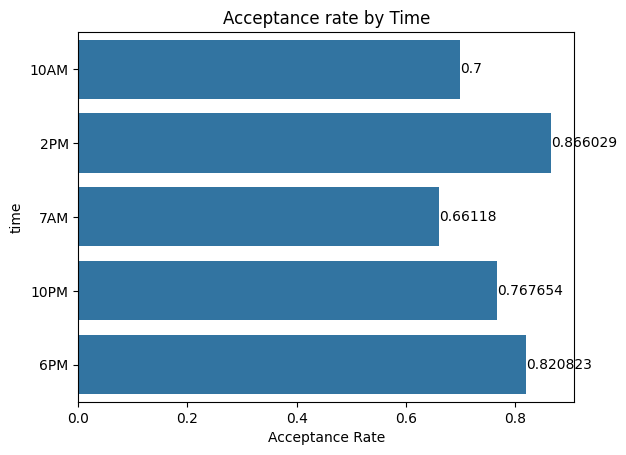

In [232]:
#time also appears to be a signficant factor in acceptance rate, particularly around the 2-6pm range
TimeChart = sns.barplot(NewData, y = 'time', x = 'Y', errorbar = None)
TimeChart.bar_label(TimeChart.containers[0], fontsize = 10)
TimeChart.set_title("Acceptance rate by Time")
TimeChart.set(ylabel="Occupation", xlabel='Acceptance Rate')
plt.show()

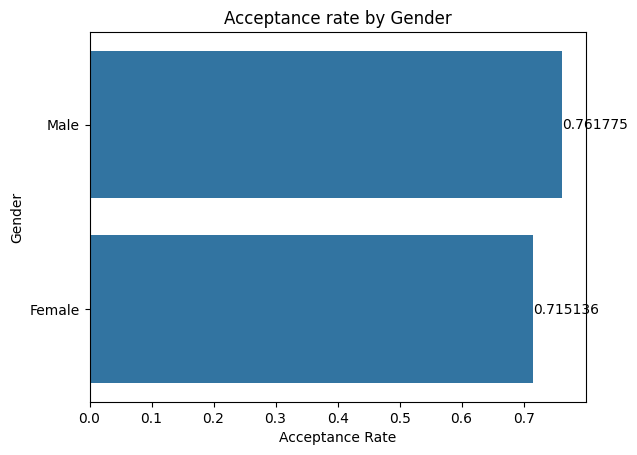

In [233]:
#gender has a more slight disparity from this coupon acceptance rate at 76% vs 71%
GenderChart = sns.barplot(NewData, y = 'gender', x = 'Y', errorbar = None)
GenderChart.bar_label(GenderChart.containers[0], fontsize = 10)
GenderChart.set_title("Acceptance rate by Gender")
GenderChart.set(ylabel="Gender", xlabel='Acceptance Rate')
plt.show()

In [ ]:
#overall, some of the highes rates of acceptance for CarryAway come within the occupations of Building Grounds Clearning and Maintenance, Protective Services, and Construction and Extraction